In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
import numpy as np

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pylab import *
import seaborn as sns


	
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)


In [3]:
filenames = glob.glob('*csv')


/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_64132/2012407561.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata_RNA = newdata_RNA.append(dataRNA, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_64132/2012407561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata_GUV = newdata_GUV.append(dataGUV, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_64132/2012407561.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata_RNA = newdata_RNA.append(dataRNA, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_64132/2012407561.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pa

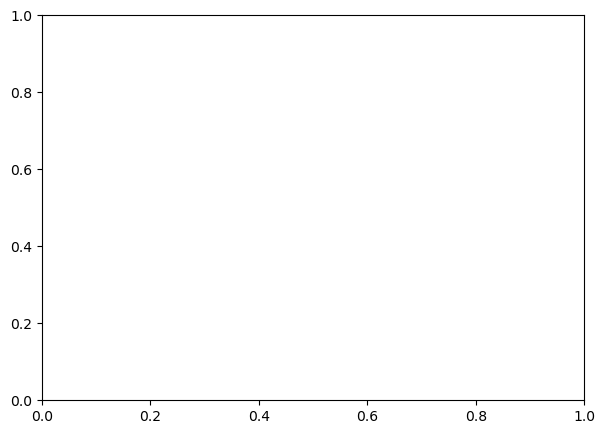

In [4]:
fig, ax = plt.subplots(figsize=(7,5))  
newdata_RNA = pd.DataFrame()
newdata_GUV = pd.DataFrame()
for i in range(len(filenames)):
    test = 'RNA' in filenames[i]
    if test == True: 
        name= filenames[i]
        newname = name.replace('RNA','GUV')
        #print(newname)
        dataRNA = pd.read_csv(filenames[i], skiprows=1, delimiter=',', dtype='float', names=['x','y'])
        dataGUV = pd.read_csv(newname, skiprows=1, delimiter=',', dtype='float', names=['x','y'])
    
        dataRNA['x']= dataRNA['x'].div(max(dataRNA['x']))
        dataRNA['y']= dataRNA['y'].div(max(dataRNA['y']))
        newdata_RNA = newdata_RNA.append(dataRNA, ignore_index=True)
        #print(newdata)
        
        dataGUV['x']= dataGUV['x'].div(max(dataGUV['x']))
        dataGUV['y']= dataGUV['y'].div(max(dataGUV['y']))
        newdata_GUV = newdata_GUV.append(dataGUV, ignore_index=True)
        
        


newdata_RNA=newdata_RNA.sort_values(by=['x'])
#newdata_GUV=newdata_GUV.sort_values(by=['x'])
roll_RNA=newdata_RNA.rolling(window=100).mean()
#roll_GUV=newdata_GUV.rolling(window=100).mean()

radius = roll_RNA['x']
farbe = roll_RNA['y']




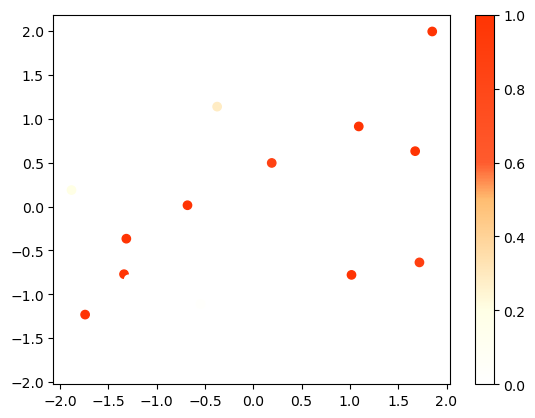

In [5]:
x,y,c = zip(*np.random.rand(30,3)*4-2)
inferno = mpl.colormaps['YlOrBr']
#inferno = sns.color_palette('inferno')
cvals  = [0,0.2,0.5,0.6,1]
colors = ['#ffffff',inferno(0),'#ffbd71','#FF5b2e','#ff3403']
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

plt.scatter(x,y,c=c, cmap=cmap, norm=norm)
plt.colorbar()

plt.savefig('colorbar.svg', dpi=100)


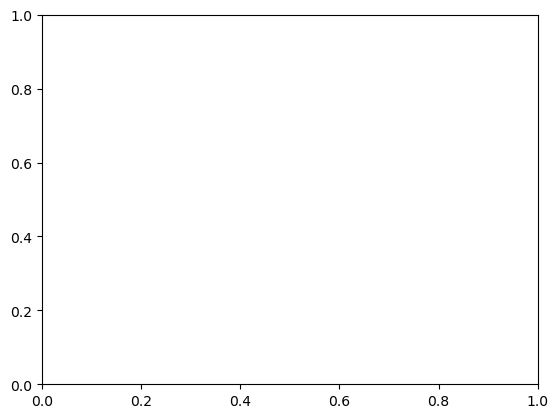

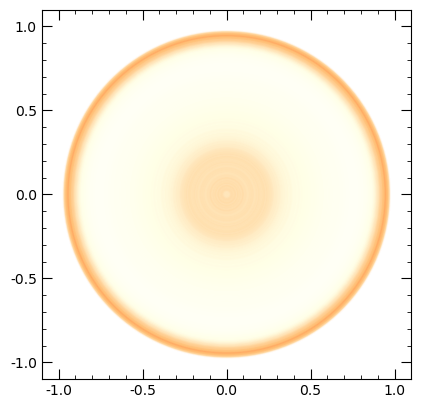

In [6]:
fig, ax = plt.subplots()

cmap.set_bad('white',1.)
fig, ax = plt.subplots()
for i in range(0,len(radius)):
    circle=plt.Circle((0,0),radius[i], fill = False, color=cmap(farbe[i]), alpha=0.3)
    ax.add_patch(circle)

plt.xlim( -1.1 , 1.1 )
plt.ylim( -1.1 , 1.1 )
ax.set_aspect( 1 )
ax.set_facecolor('white')




#ax.xaxis.set_ticks(np.arange(-1, 1, 0.5))

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.tick_params(which='major',axis="both",length=7)
ax.tick_params(which='minor',axis="both",length=3)
ax.tick_params(which='both',axis="y",direction="in", right=True)
ax.tick_params(which='both',axis="x",direction="in", top=True)

plt.minorticks_on()
plt.savefig('circle.svg', dpi=100)


/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_64132/3998743787.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  symRNA=symRNA.append(newdata_RNA, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_64132/3998743787.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  symRNA=symRNA.append(newdata_RNA, ignore_index=True)


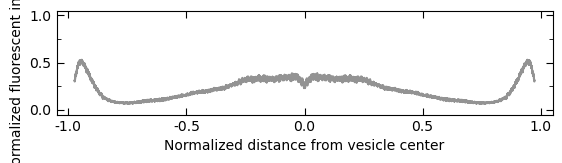

In [7]:
fig, ax = plt.subplots()

#print(roll)
#plt.plot(roll_RNA['x'],roll_RNA['y'], color='#282828', alpha=0.5)
symRNA = pd.DataFrame()

symRNA=symRNA.append(newdata_RNA, ignore_index=True)
symRNA['x']=symRNA['x'].multiply(-1)
symRNA=symRNA.append(newdata_RNA, ignore_index=True)
symRNA=symRNA.sort_values(by=['x'])
line_RNA=symRNA.rolling(window=100).mean()

plt.plot(line_RNA['x'],line_RNA['y'], color='#282828', alpha=0.5)


ax.set_aspect( 0.4 )
plt.xlim( -1.05 , 1.05 )
plt.ylim( -0.05 , 1.05 )


plt.xlabel('Normalized distance from vesicle center')
plt.ylabel('Normalized fluorescent intensity')


ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.tick_params(which='major',axis="both",length=5)
ax.tick_params(which='minor',axis="both",length=3)
ax.tick_params(which='both',axis="y",direction="in", right=True)
ax.tick_params(which='both',axis="x",direction="in", top=True)

plt.savefig('line.svg', dpi=100)